    This notebook predicts the survivors using the famous Titanic dataset. It performs analysis using the following approaches: 
    1) Exploratory Data Analysis
    2) Handling missing features 
    3) Feature Normalization
    4) Feature encoding
    5) Feature importance with correlation analysis and DT
    5) Classification using SVM, NN, LR, XGBoost and DT

Import necessary libraries

In [1]:
import pandas as pd #  for handling data
from matplotlib import pyplot as plt #  visualisation purposes
import seaborn as sns #  for visualisation
import plotly.express as px


import numpy as np #  for array operations
from pathlib import Path #  for OS and file operations
import os #  for directory and so on

#  classification models
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report #  metrics
from sklearn.model_selection import KFold #  for kfold analysis

from sklearn.model_selection import GridSearchCV #  for parameter optimization
from sklearn.preprocessing import MinMaxScaler #  for feature normalization

Load dataset

In [2]:
my_path = 'C:/Reputation Advisor/dev/titanic/'

df_train = pd.read_csv(os.path.join(my_path, 'train.csv'))
df_test = pd.read_csv(os.path.join(my_path, 'test.csv'))

Print data attributes

In [3]:
def print_df_info(df):
    
    print(df.info())
    
    print('-----------------')    
    
    print('Printing describe: \n', df.describe())
    
    print('-----------------')
    print('Missing value for train data: \n', df_train.isna().sum()/len(df_train))
    
    print('-----------------')    
    print('Value counts: \n', df.value_counts())
        
#     print('-----------------')    
    
#     print('Printing data types: \n', df.dtypes)
    
print_df_info(df_train)  
print_df_info(df_test)    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----------------
Printing describe: 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.

In [4]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Exploratory Data Analysis

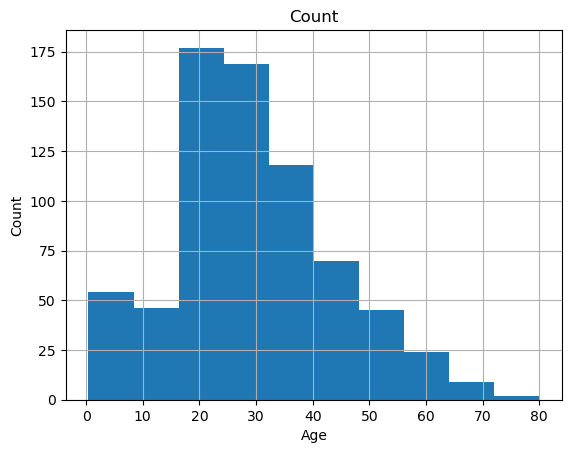

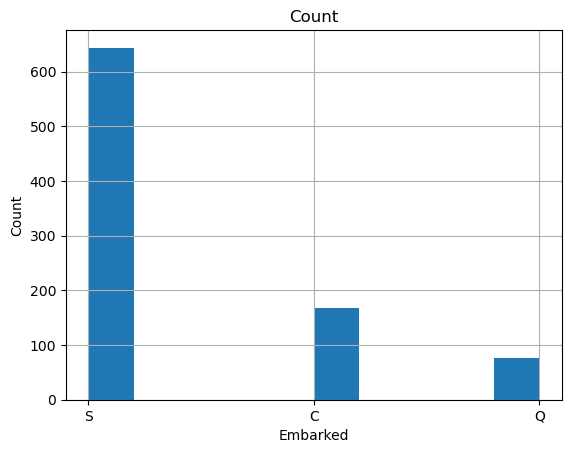

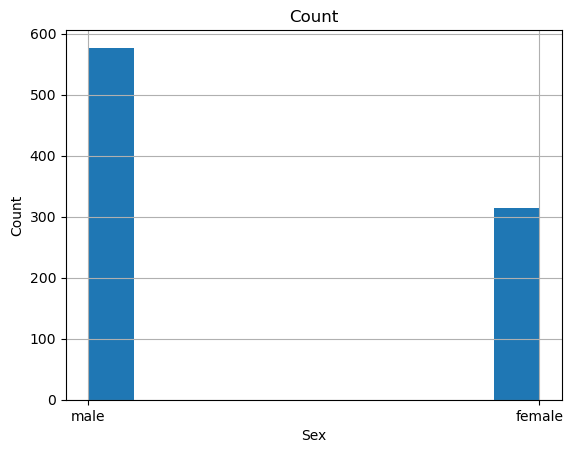

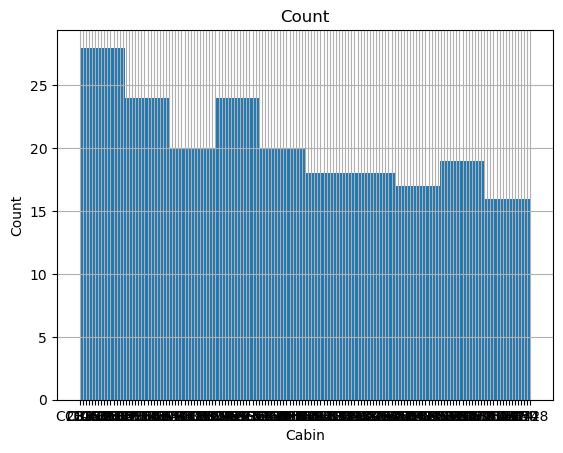

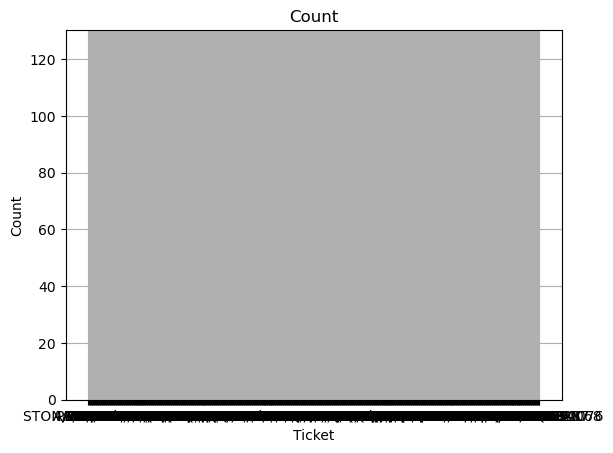

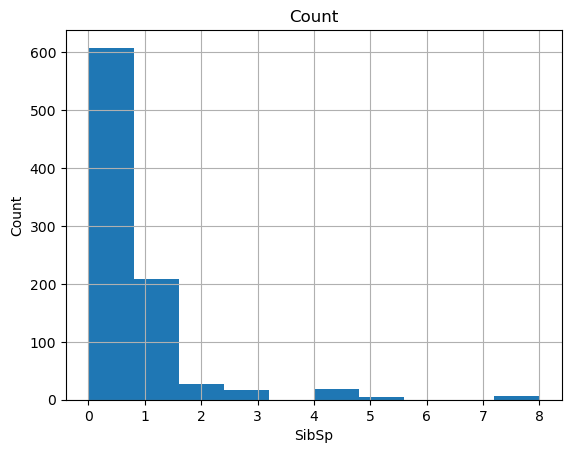

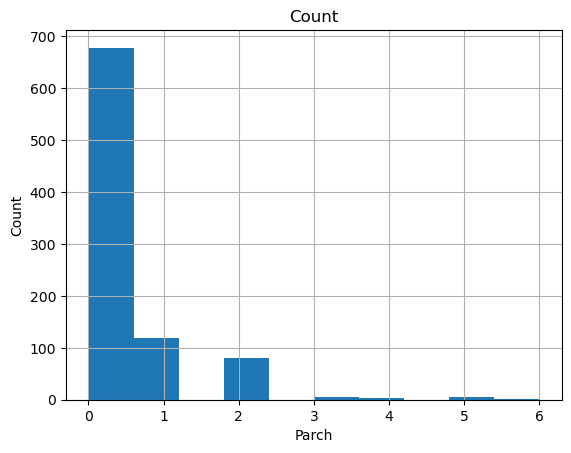

In [5]:
def barplot(feature):
    df_train[feature].hist()
    plt.title('Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    
barplot('Age')
barplot('Embarked')
#  barplot('Name')
barplot('Sex')
barplot('Cabin')
barplot('Ticket')
barplot('SibSp')
barplot('Parch')

# Handling missing data

    77% of cabin data is missing (as seen above), so we can remove it and impute the other features. 
    76% of Ticket feature is unique. Ticket info might give information about people from the same family, but it is too sparse, so remove it.

In [6]:
len(set(df_train['Ticket']))/len(df_train)


0.7643097643097643

In [7]:
df_train = df_train.drop(columns = ['Cabin'])

df_train = df_train.drop(columns = ['Ticket'])

df_train = df_train.drop(columns = ['Name'])


df_train = df_train.drop(columns = ['PassengerId'])

missing_features = df_train.columns[df_train.isnull().any()]
print(missing_features) #  Age and Embarked



Index(['Age', 'Embarked'], dtype='object')


    Filling missing data for Age and Embarked

After removing missing feature and replacing some of them
---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
-----------------
Printing describe: 
          Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   28.566970    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.199572    1.10

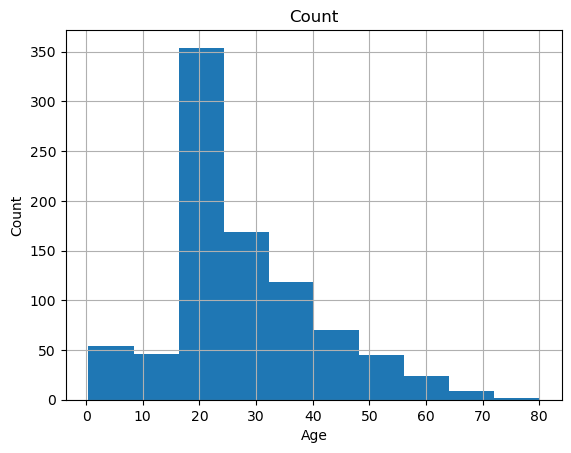

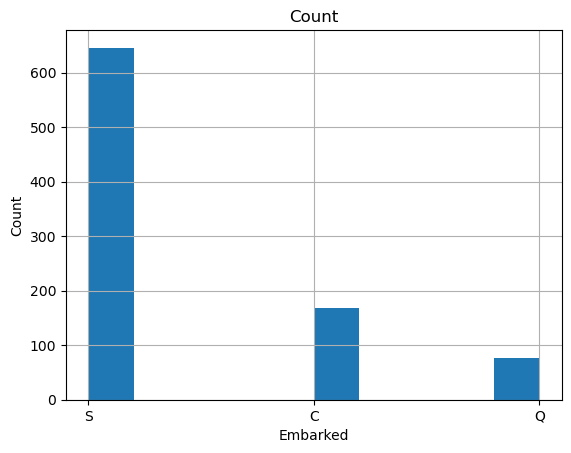

In [8]:
# compute mode of each feature from the train set
mode_age = df_train['Age'].mode().iloc[0]
mode_embarked = df_train['Embarked'].mode().iloc[0]

# fill missing values in both sets with modes
df_train['Age'].fillna(mode_age, inplace=True)
df_train['Embarked'].fillna(mode_embarked, inplace=True)


# #  replace missing values using mode
# df_train['Age'].fillna(df_train['Age'].mode().iloc[0], inplace=True)

# #  replace missing values using mode
# df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace=True)

print('After removing missing feature and replacing some of them')
print('---------------------------------------------------------')
print_df_info(df_train)   


barplot('Age')
barplot('Embarked')

        Let's have a look at overall data now

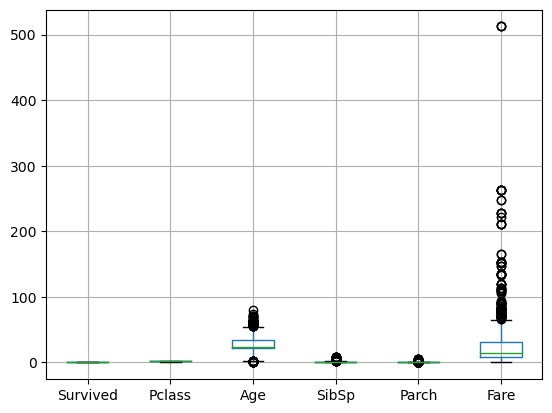

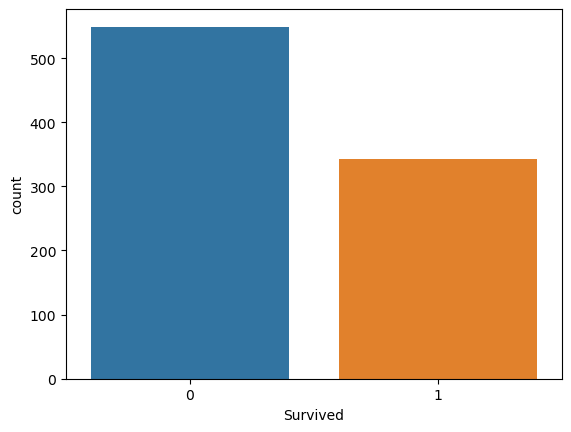

In [9]:
df_train.boxplot()
plt.show()

sns.countplot(x='Survived', data=df_train)
plt.show()    

        Check for outliers

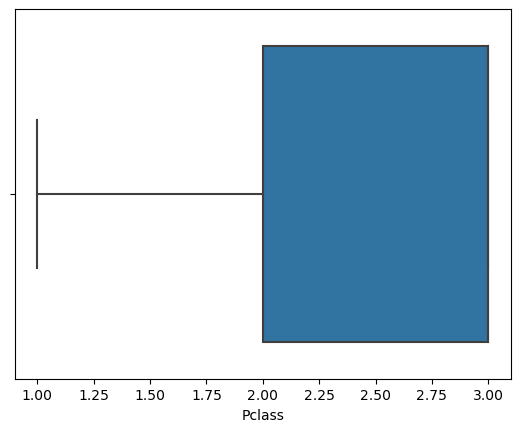

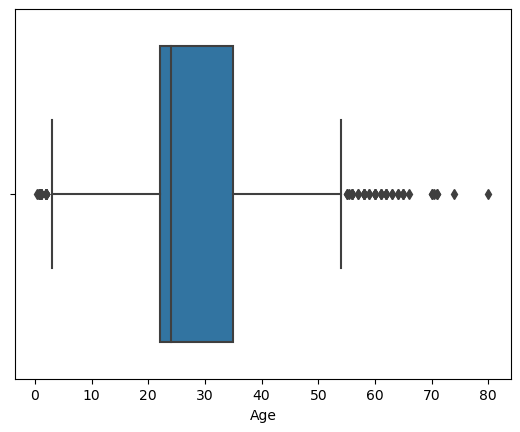

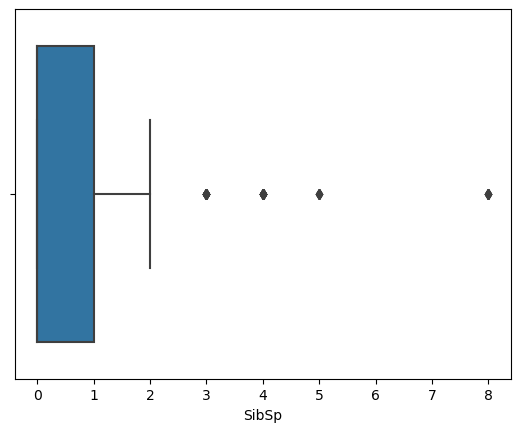

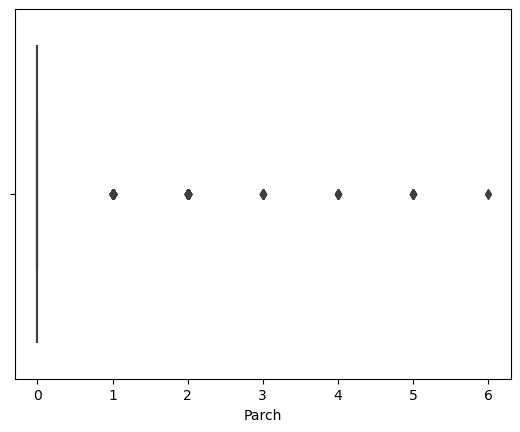

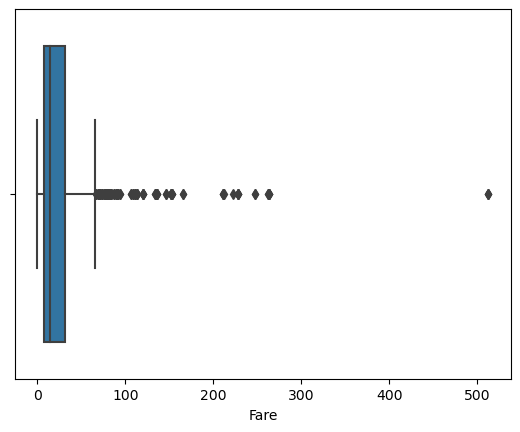

In [10]:
#  Name, Sex, Ticket and Embarked are categorical values.

sns.boxplot(x=df_train['Pclass'])
plt.show()
sns.boxplot(x=df_train['Age'])
plt.show()
sns.boxplot(x=df_train['SibSp'])
plt.show()
sns.boxplot(x=df_train['Parch'])
plt.show()
sns.boxplot(x=df_train['Fare'])
plt.show()

Convert categorical features to numbers

In [11]:
# One-Hot Encoding for features
df_train = pd.get_dummies(df_train, columns=['Sex'])
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_train = pd.get_dummies(df_train, columns=['Pclass'])
df_train = pd.get_dummies(df_train, columns=['Parch'])
df_train = pd.get_dummies(df_train, columns=['SibSp'])


In [12]:
print(df_train.columns)
df_train

Index(['Survived', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8'],
      dtype='object')


Survived   Age     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0           0  22.0   7.2500           0         1           0           0   
1           1  38.0  71.2833           1         0           1           0   
2           1  26.0   7.9250           1         0           0           0   
3           1  35.0  53.1000           1         0           0           0   
4           0  35.0   8.0500           0         1           0           0   
..        ...   ...      ...         ...       ...         ...         ...   
886         0  27.0  13.0000           0         1           0           0   
887         1  19.0  30.0000           1         0           0           0   
888         0  24.0  23.4500           1         0           0           0   
889         1  26.0  30.0000           0         1           1           0   
890         0  32.0   7.7500           0         1           0           1   

     Embarked_S  Pclass_1  Pclass_2  ...  Parch_4  Parch_5  Parch_6  SibSp_0  \
0             1         0         0  ...        0        0        0        0   
1             0         1         0  ...        0        0        0        0   
2             1         0         0  ...        0        0        0        1   
3             1         1         0  ...        0        0        0        0   
4             1         0         0  ...        0        0        0        1   
..          ...       ...       ...  ...      ...      ...      ...      ...   
886           1         0         1  ...        0        0        0        1   
887           1         1         0  ...        0        0        0        1   
888           1         0         0  ...        0        0        0        0   
889           0         1         0  ...        0        0        0        1   
890           0         0         0  ...        0        0        0        1   

     SibSp_1  SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  
0          1        0        0        0        0        0  
1          1        0        0        0        0        0  
2          0        0        0        0        0        0  
3          1        0        0        0        0        0  
4          0        0        0        0        0        0  
..       ...      ...      ...      ...      ...      ...  
886        0        0        0        0        0        0  
887        0        0        0        0        0        0  
888        1        0        0        0        0        0  
889        0        0        0        0        0        0  
890        0        0        0        0        0        0  

[891 rows x 25 columns]

# Feature Importance and Correlation

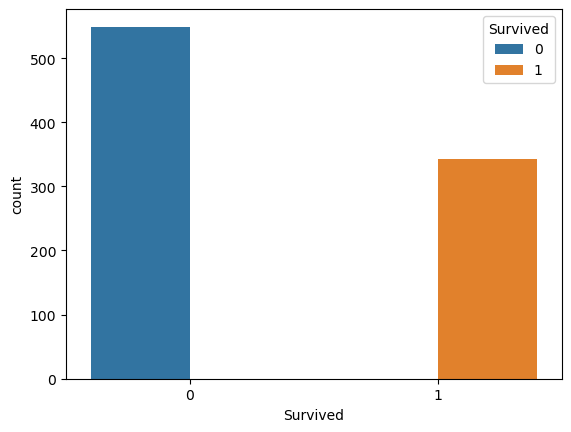

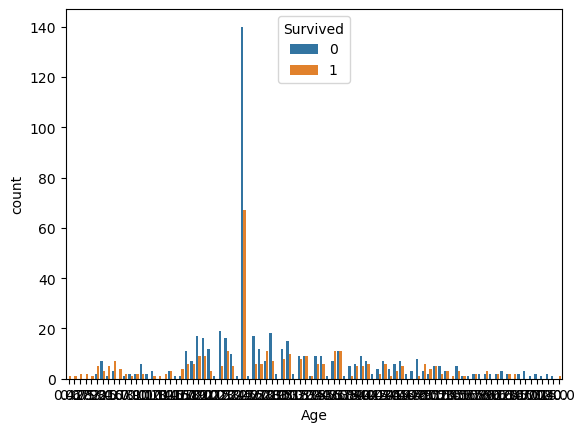

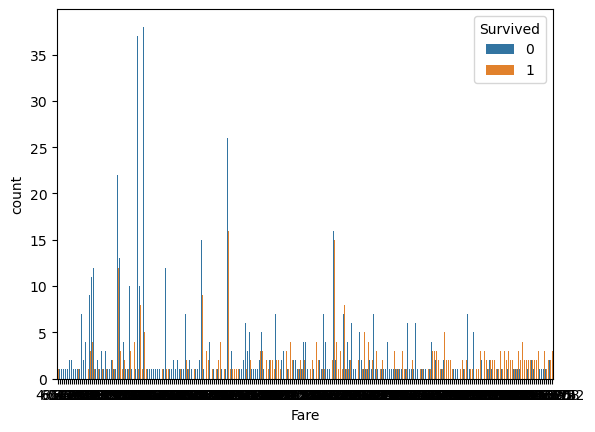

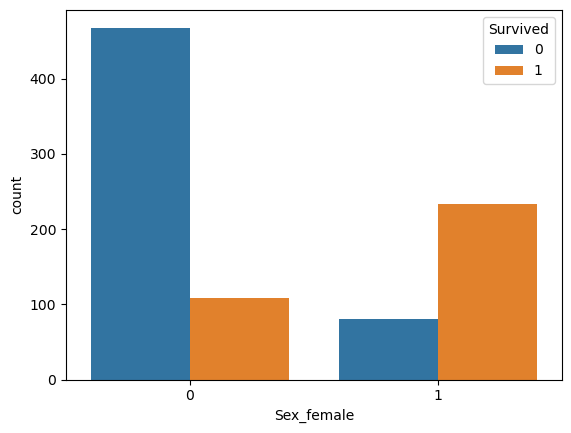

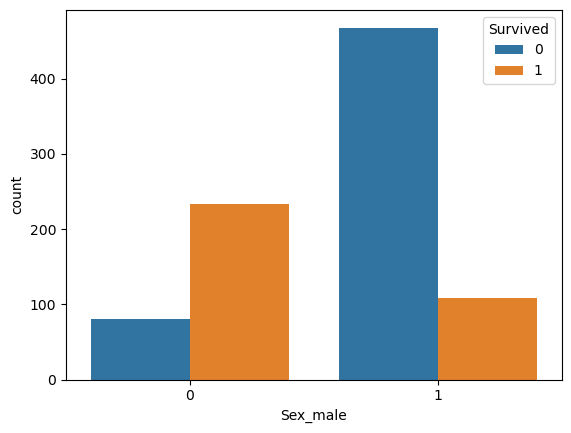

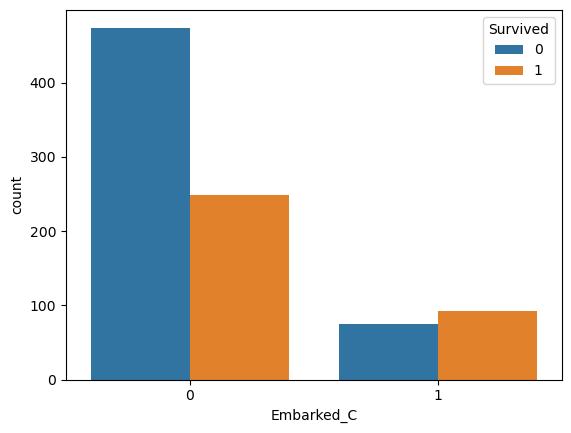

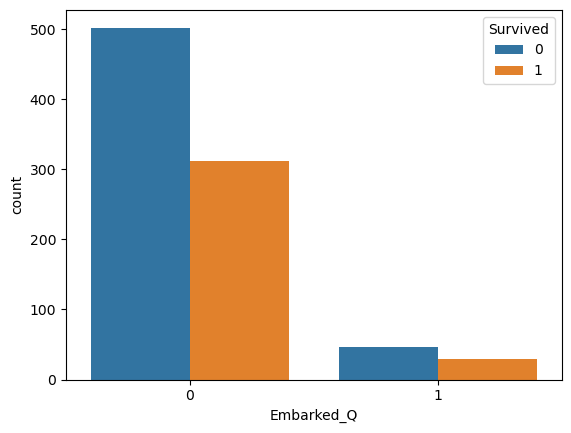

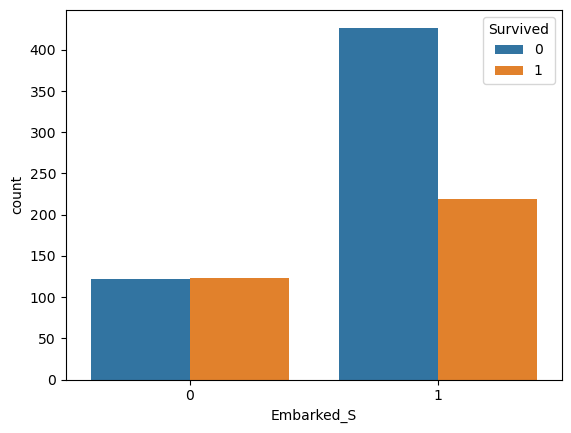

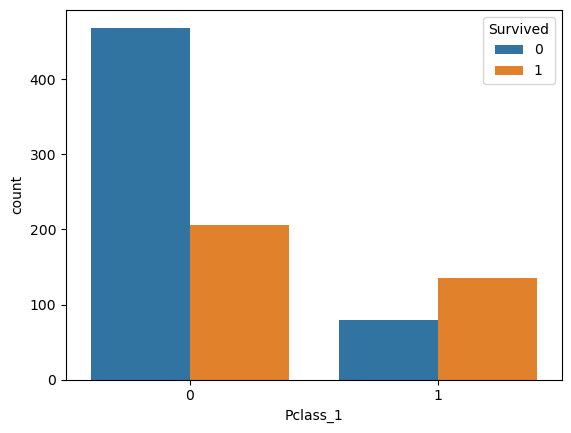

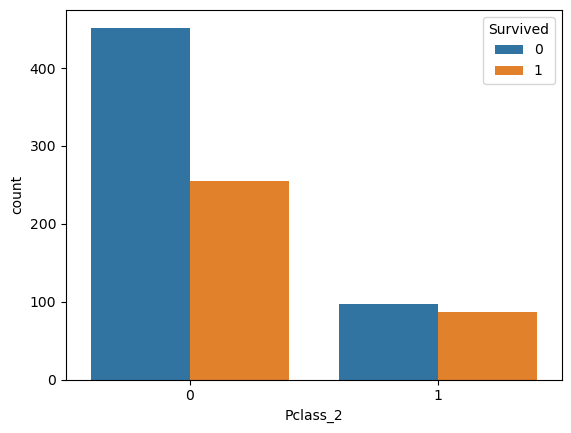

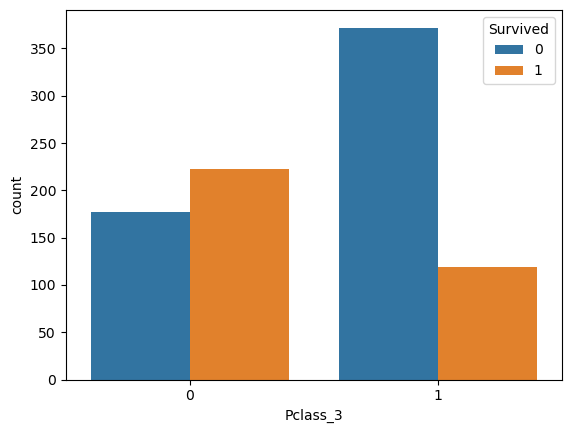

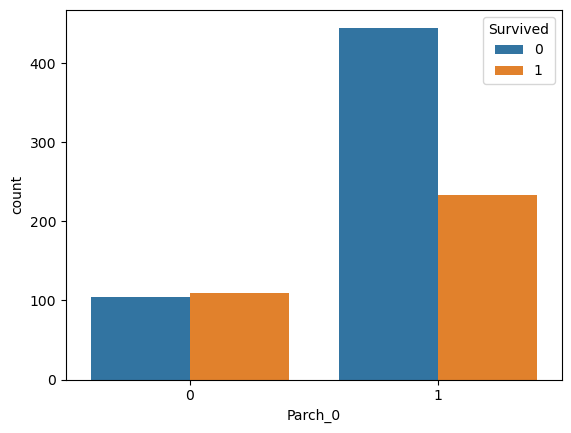

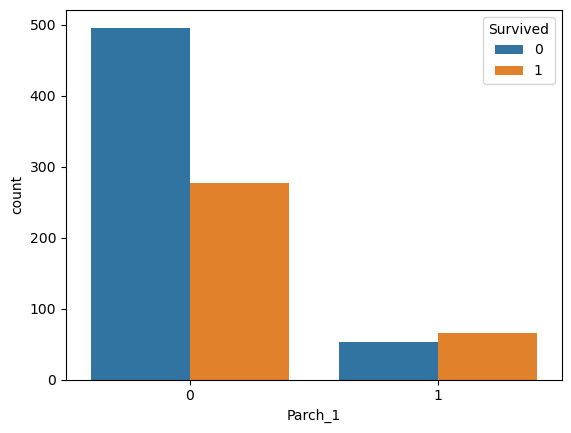

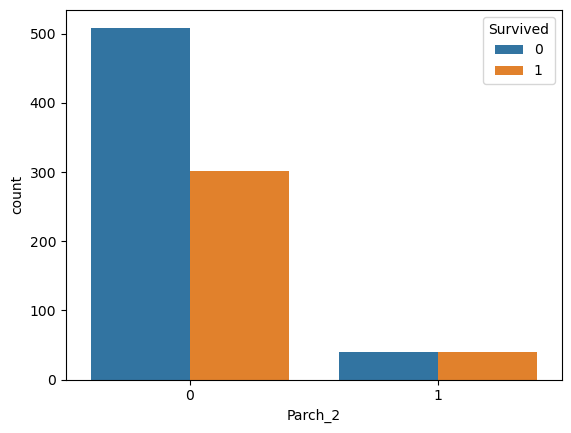

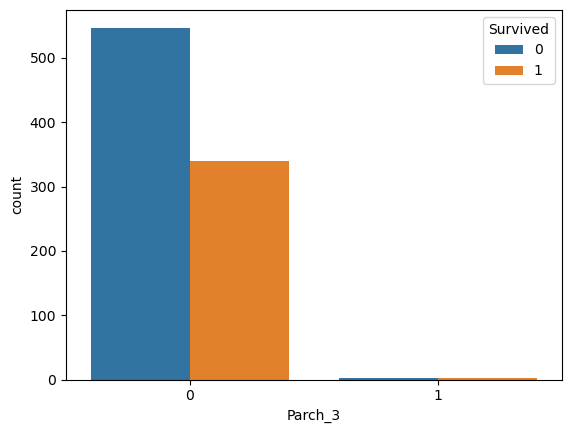

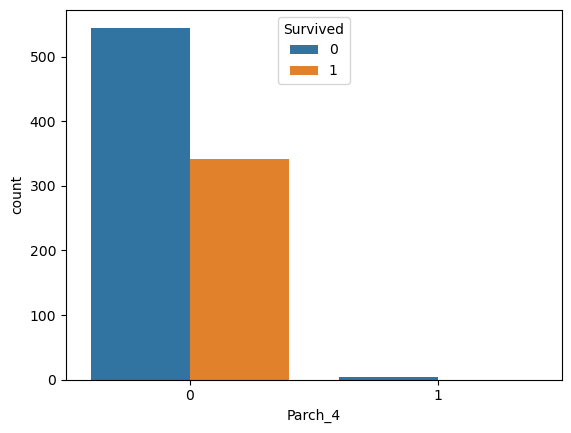

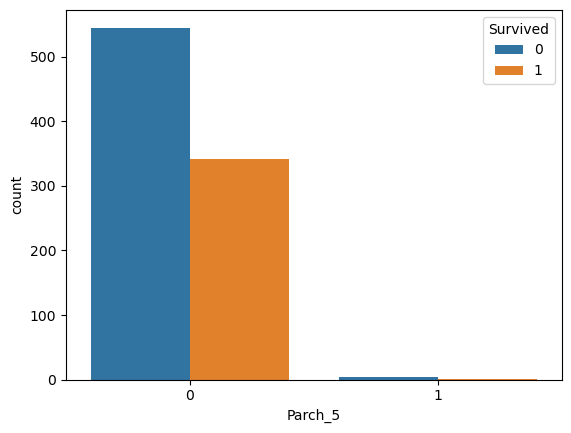

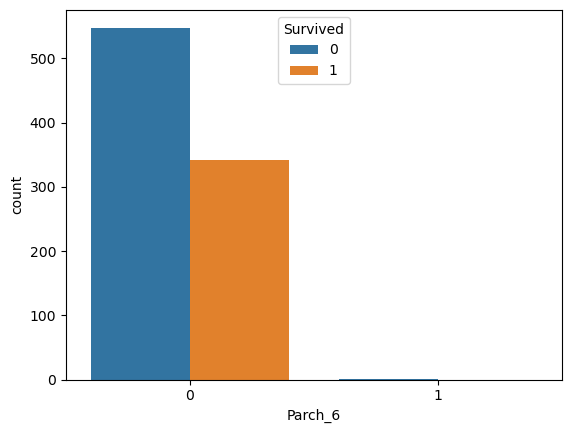

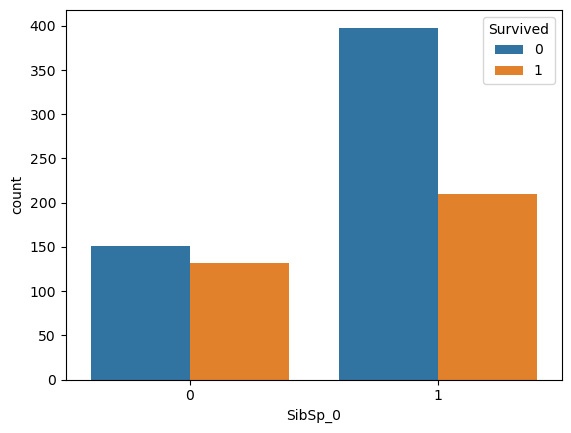

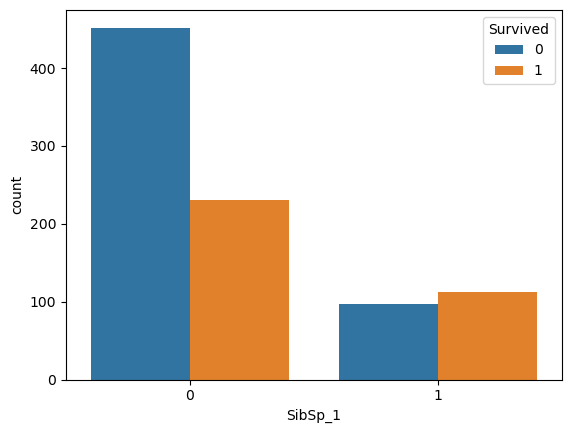

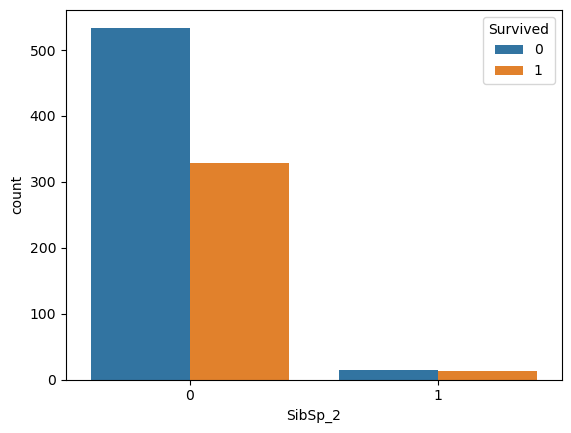

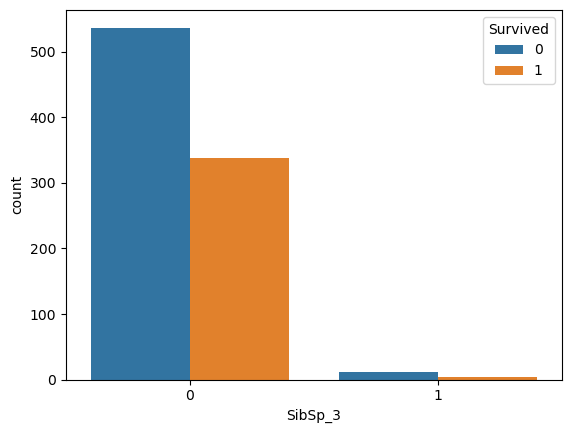

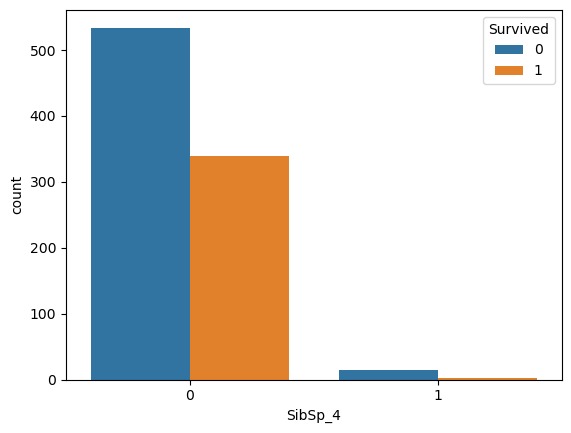

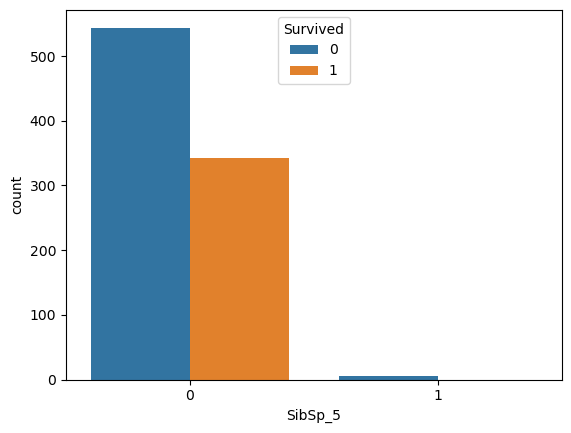

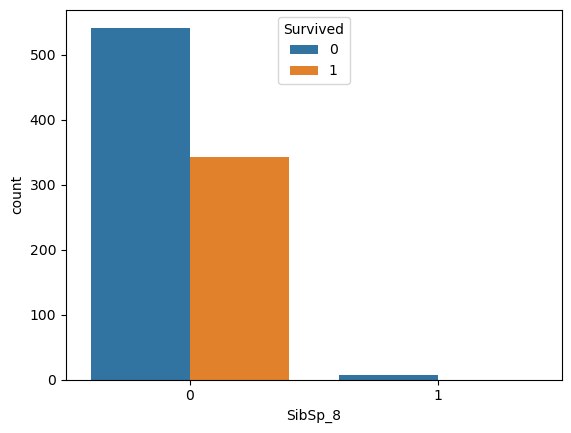

In [13]:
for feature in df_train.columns:

    sns.countplot(x=feature,hue='Survived',data=df_train)
    plt.show()


    Normalization

In [14]:
# create the MinMaxScaler object
scaler_fare = MinMaxScaler()

# fit and transform the age column to normalize it
df_train['Fare'] = scaler_fare.fit_transform(df_train[['Fare']])

scaler_age = MinMaxScaler()

# fit and transform the age column to normalize it
df_train['Age'] = scaler_age.fit_transform(df_train[['Age']])

Remove outliers

In [15]:
# Calculate the upper and lower bounds for outliers
#  interquartile range (IQR) 
def remove_outliers(df, feature):
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Remove the rows with outliers
    df = df[(df[feature] < upper_bound) & (df[feature] > lower_bound)]
    
    return df

# df_train = remove_outliers(df_train, 'Age')
# df_train = remove_outliers(df_train, 'Fare')

# Feature Correlation and Importance

In [16]:
# create correlation matrix
corr_matrix = df_train.corr()

# create heatmap figure using Plotly
fig = px.imshow(corr_matrix,
                labels=dict(x="Features", y="Features"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='Blues')

# add title to the plot
fig.update_layout(title_text='Correlation Matrix Heatmap')

# show the plot
fig.show()

In [17]:
def run_classification_models (X_train, y_train):


    # create the XGBoost model
    xgb_clf = xgb.XGBClassifier()

    # define the parameter grid for grid search
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300],
        'subsample': [0.5, 0.7, 1],
        'colsample_bytree': [0.5, 0.7, 1]
    }

    # create the grid search object
    grid_search = GridSearchCV(xgb_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    #return_train_score=True, verbose=3)

    # fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # print the best parameters and the corresponding accuracy score
    print("Best parameters: ", grid_search.best_params_)
    print("Best accuracy: ", grid_search.best_score_)

    # make predictions on the test set using the best parameters
    y_pred = grid_search.predict(X_train_df)
    test_accuracy = accuracy_score(y_train, y_pred)
    print("Test accuracy XGB: ", test_accuracy)
    


    # create an instance of the decision tree classifier
    dt = DecisionTreeClassifier()

    # specify the parameter grid for grid search
    param_grid = {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 4, 5, 6, 7, 8, 9, None],
        "min_samples_split": [2, 4, 6, 8, 10],
        "min_samples_leaf": [1, 2, 3, 4, 5],
    }

    # create an instance of the grid search
    grid_search = GridSearchCV(dt, param_grid, cv=10, scoring="accuracy")

    # fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # print the best parameters and the best score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # make predictions on the test set using the best parameters
    y_pred = grid_search.predict(X_train)
    test_accuracy = accuracy_score(y_train, y_pred)
    print("Test accuracy DT: ", test_accuracy)
    


    # Define the parameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.01, 0.1, 1, 'scale', 'auto']
    }

    # Create the SVM model
    svm_model = svm.SVC()

    # Create the grid search object
    grid_search = GridSearchCV(svm_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best accuracy: ", grid_search.best_score_)
    
    # make predictions on the test set using the best parameters
    y_pred = grid_search.predict(X_train)
    test_accuracy = accuracy_score(y_train, y_pred)
    print("Test accuracy SVM: ", test_accuracy)
    


    # Define the parameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    # Create the logistic regression model
    logreg = LogisticRegression()

    # Create the grid search object
    grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best accuracy: ", grid_search.best_score_)
    
    # make predictions on the test set using the best parameters
    y_pred = grid_search.predict(X_train_df)
    test_accuracy = accuracy_score(y_train, y_pred)
    print("Test accuracy LR: ", test_accuracy)


    # Define the parameter grid
    param_grid = {
        'hidden_layer_sizes': [(10,), (20,), (30,)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    }

    # Create the neural network model
    mlp = MLPClassifier()

    # Create the grid search object
    grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best accuracy: ", grid_search.best_score_)
    
    # make predictions on the test set using the best parameters
    y_pred = grid_search.predict(X_train)
    test_accuracy = accuracy_score(y_train, y_pred)
    print("Test accuracy NN: ", test_accuracy)


In [18]:
X_train_df = df_train.drop('Survived', axis=1)
y_train_df = df_train.Survived

run_classification_models(X_train_df, y_train_df)

C:\Users\ArifogluD\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Best accuracy:  0.835043695380774
Test accuracy XGB:  0.9304152637485971
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.8205118601747815
Test accuracy DT:  0.8709315375982043
Best hyperparameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy:  0.812609238451935
Test accuracy SVM:  0.8585858585858586
Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy:  0.8036079900124845
Test accuracy LR:  0.8092031425364759
Best hyperparameters:  {'activation': 'relu',

C:\Users\ArifogluD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Feature Importance by Decision Tree

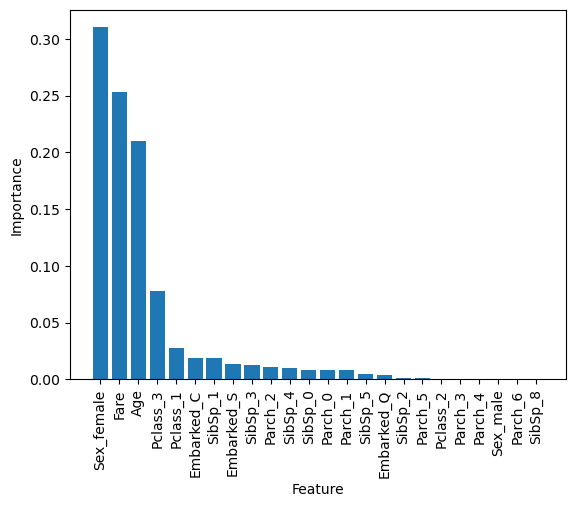

In [19]:
# Fit a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train_df, y_train_df)

# Compute the feature importances using the Gini impurity
importances = model.feature_importances_

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]



# Plot the feature importances
plt.bar(range(X_train_df.shape[1]), importances[sorted_idx])
plt.xticks(range(X_train_df.shape[1]), X_train_df.columns[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()



# Prediction

    Prediction on train data

In [20]:
#  use the params of the best model which is XGBoost
params = {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(**params)

# Train the classifier on the training data
xgb_clf.fit(X_train_df, y_train_df)

# # Make predictions on the test data
# y_pred_test = xgb_clf.predict(X_test_df)

# Make predictions on the test data
y_pred_train = xgb_clf.predict(X_train_df)

# ----- 

# Create confusion matrix
cm = confusion_matrix(y_train_df, y_pred_train)

# Calculate f-measure
f1 = f1_score(y_train_df, y_pred_train)

# Calculate accuracy
acc = accuracy_score(y_train_df, y_pred_train)

# Calculate precision
prec = precision_score(y_train_df, y_pred_train)

# Calculate recall
rec = recall_score(y_train_df, y_pred_train)

# Print confusion matrix, f-measure, accuracy, precision, and recall
print("Confusion matrix:")
print(cm)
print("F-measure:", f1)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

clreport = classification_report(y_train_df, y_pred_train)

print(clreport)


C:\Users\ArifogluD\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix:
[[518  31]
 [ 64 278]]
F-measure: 0.8540706605222734
Accuracy: 0.8933782267115601
Precision: 0.8996763754045307
Recall: 0.8128654970760234
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       549
           1       0.90      0.81      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.88      0.89       891
weighted avg       0.89      0.89      0.89       891



    Prediction on test data, do everything you did on train

In [21]:
# drop the same features

df_test = df_test.drop(columns = ['Cabin'])
df_test = df_test.drop(columns = ['Ticket'])
df_test = df_test.drop(columns = ['Name'])
df_test = df_test.drop(columns = ['PassengerId'])


# handle missing data using info from train set
df_test['Age'].fillna(mode_age, inplace=True)
df_test['Embarked'].fillna(mode_embarked, inplace=True)



# handle categorical variables

df_test = pd.get_dummies(df_test, columns=['Sex'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Pclass'])
df_test = pd.get_dummies(df_test, columns=['Parch'])
df_test = pd.get_dummies(df_test, columns=['SibSp'])

#  to make it same as train features
df_test = df_test.reindex(columns = X_train_df.columns, fill_value=0)


### normalization
#  transform the features using their corresponding scaler which was fitted on train data
df_test['Fare'] = scaler_fare.transform(df_test[['Fare']]) 
df_test['Age'] = scaler_age.transform(df_test[['Age']])
    

## no need to remove outliers


In [22]:
y_pred_test = xgb_clf.predict(df_test)

df_test2 = pd.read_csv(os.path.join(my_path, 'test.csv'))

df_result = pd.DataFrame([], columns = ['PassengerId', 'Survived'])

df_result['PassengerId'] = df_test2.PassengerId
df_result['Survived'] = y_pred_test

df_result.to_csv('gender_submission.csv', index=False)

# Error Analysis

In [28]:
mismatched_rows = y_train_df != y_pred_train
X_train_df[mismatched_rows]

Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
14   0.170646  0.015330           1         0           0           0   
17   0.296306  0.025374           0         1           0           0   
21   0.421965  0.025374           0         1           0           0   
25   0.472229  0.061264           1         0           0           0   
36   0.296306  0.014110           0         1           1           0   
..        ...       ...         ...       ...         ...         ...   
830  0.183212  0.028213           1         0           1           0   
852  0.107816  0.029758           1         0           1           0   
854  0.547625  0.050749           1         0           0           0   
855  0.220910  0.018250           1         0           0           0   
857  0.635587  0.051822           0         1           0           0   

     Embarked_S  Pclass_1  Pclass_2  Pclass_3  ...  Parch_4  Parch_5  Parch_6  \
14            1         0         0         1  ...        0        0        0   
17            1         0         1         0  ...        0        0        0   
21            1         0         1         0  ...        0        0        0   
25            1         0         0         1  ...        0        1        0   
36            0         0         0         1  ...        0        0        0   
..          ...       ...       ...       ...  ...      ...      ...      ...   
830           0         0         0         1  ...        0        0        0   
852           0         0         0         1  ...        0        0        0   
854           1         0         1         0  ...        0        0        0   
855           1         0         0         1  ...        0        0        0   
857           1         1         0         0  ...        0        0        0   

     SibSp_0  SibSp_1  SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  
14         1        0        0        0        0        0        0  
17         1        0        0        0        0        0        0  
21         1        0        0        0        0        0        0  
25         0        1        0        0        0        0        0  
36         1        0        0        0        0        0        0  
..       ...      ...      ...      ...      ...      ...      ...  
830        0        1        0        0        0        0        0  
852        0        1        0        0        0        0        0  
854        0        1        0        0        0        0        0  
855        1        0        0        0        0        0        0  
857        1        0        0        0        0        0        0  

[95 rows x 24 columns]

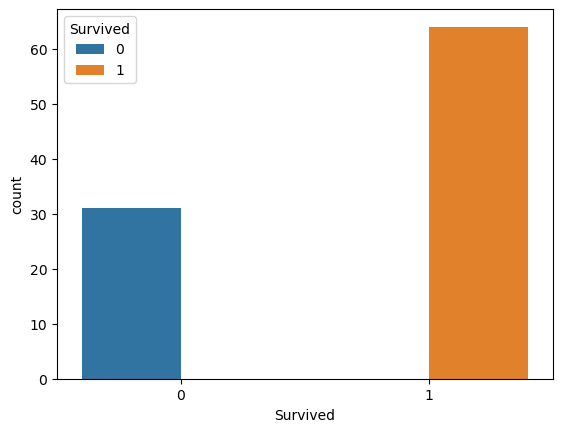

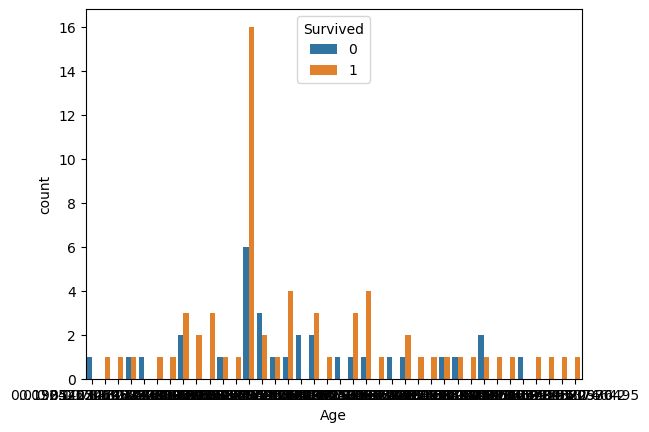

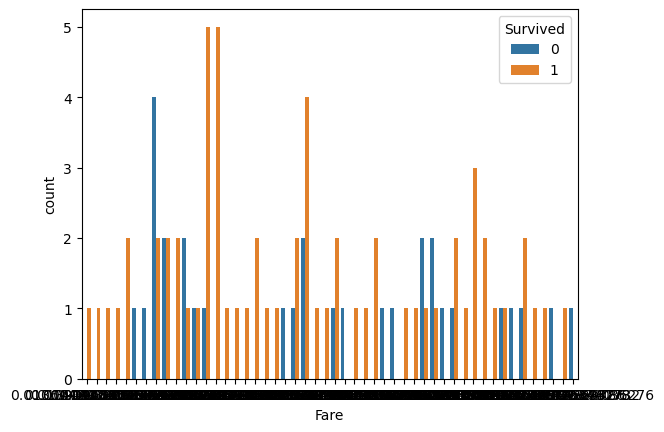

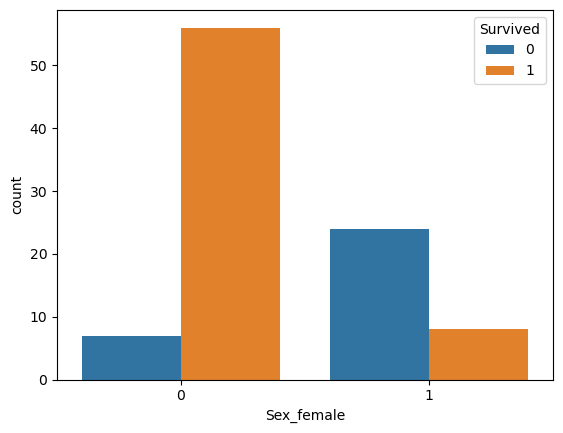

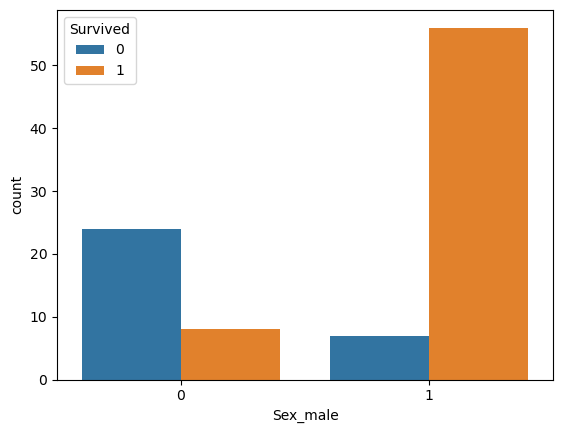

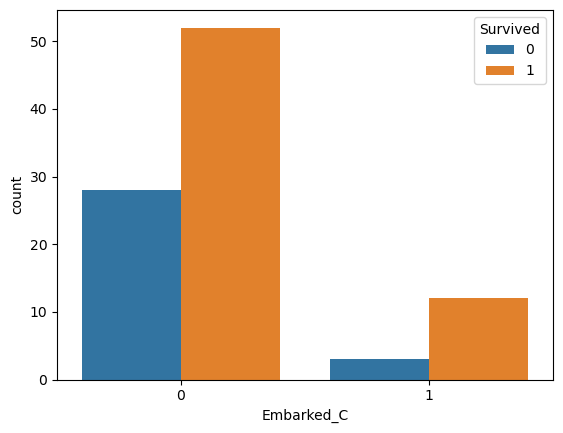

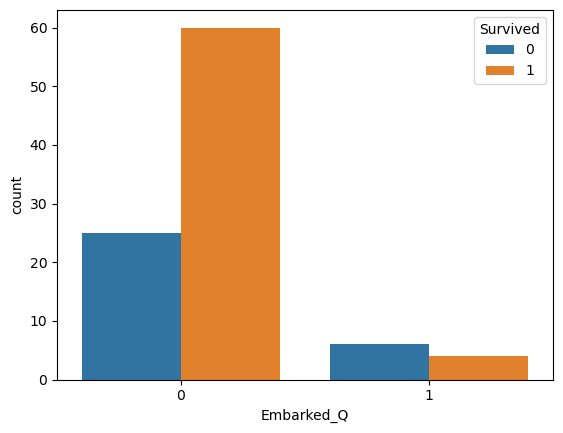

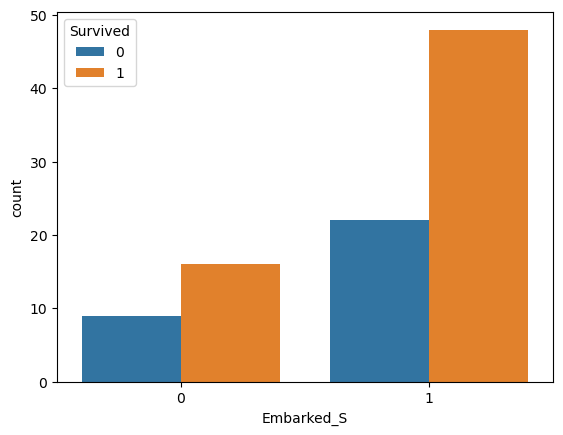

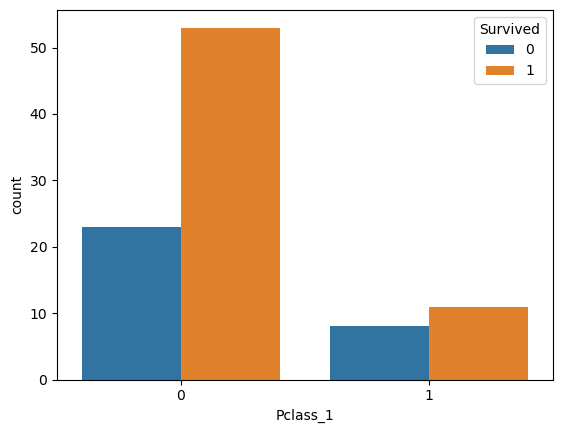

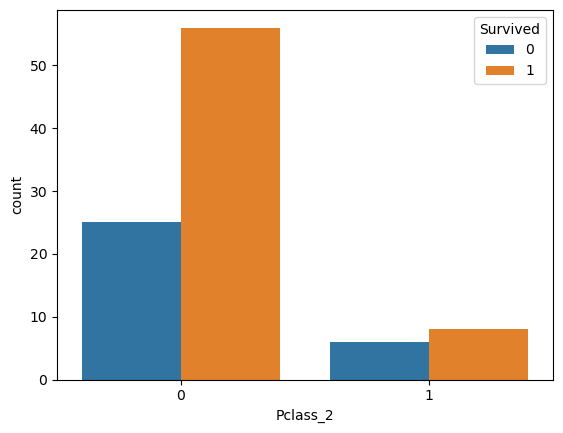

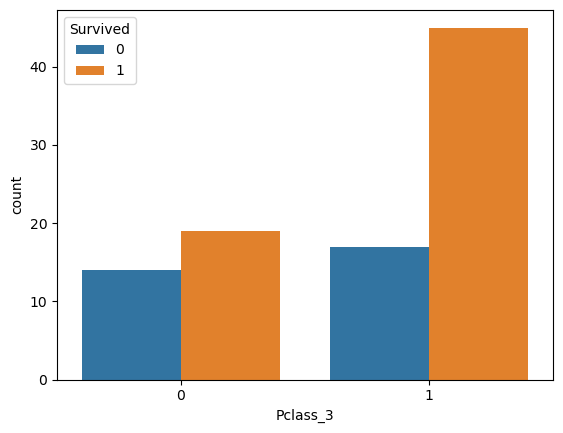

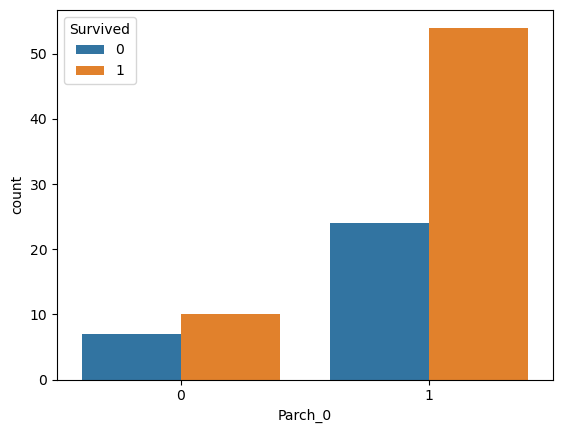

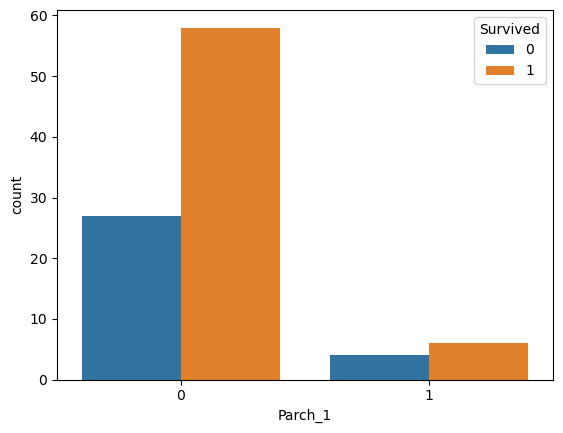

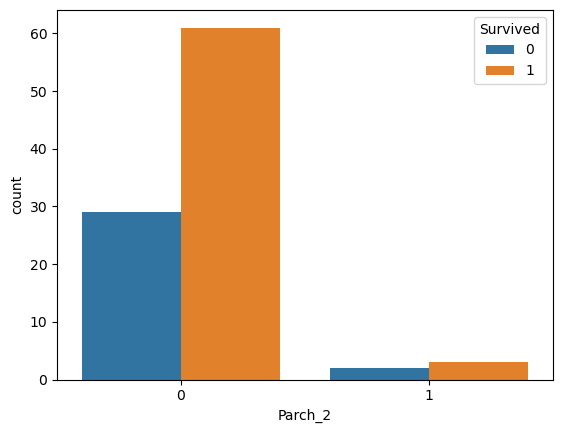

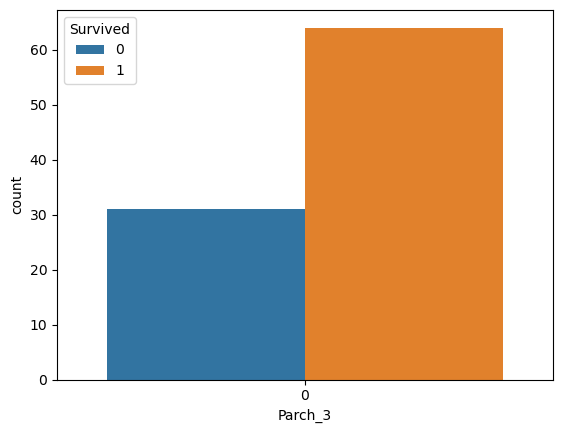

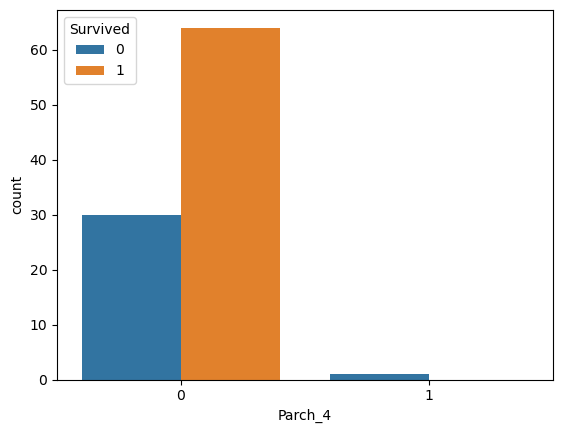

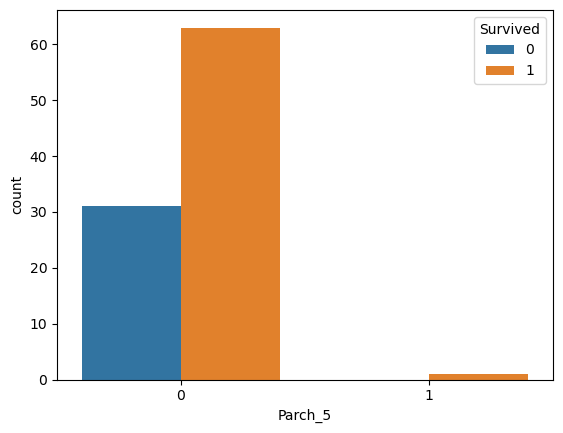

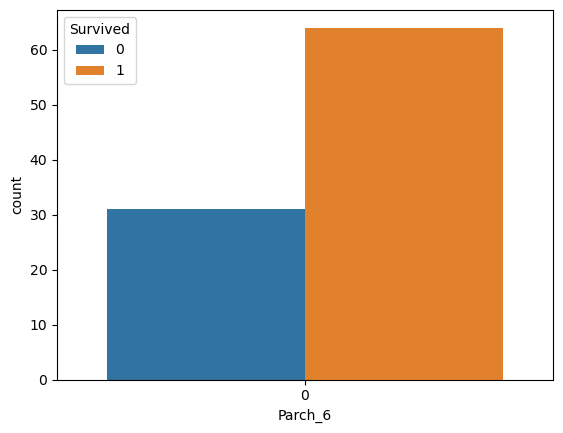

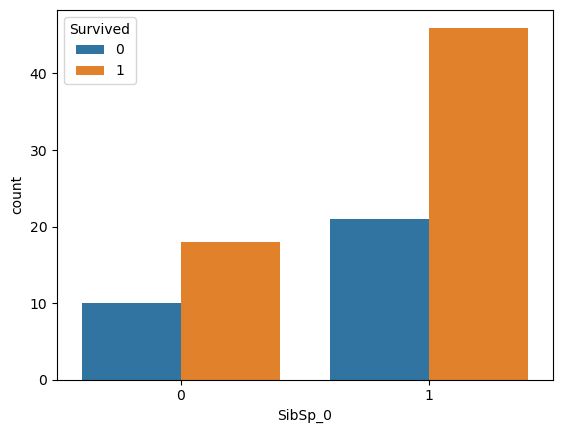

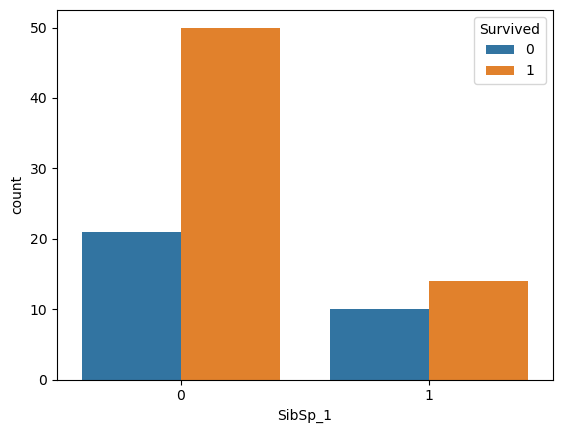

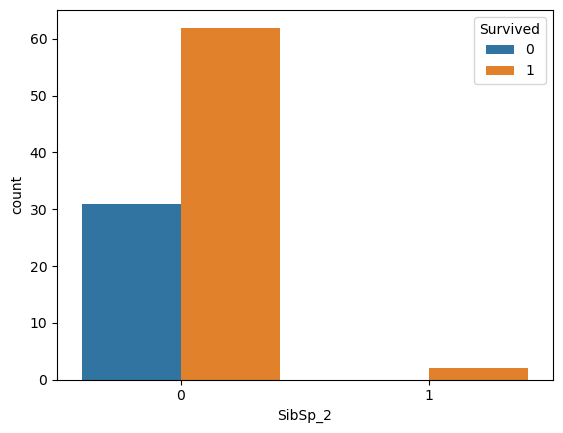

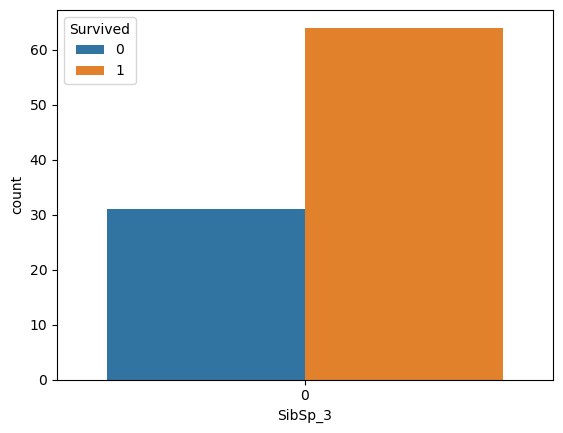

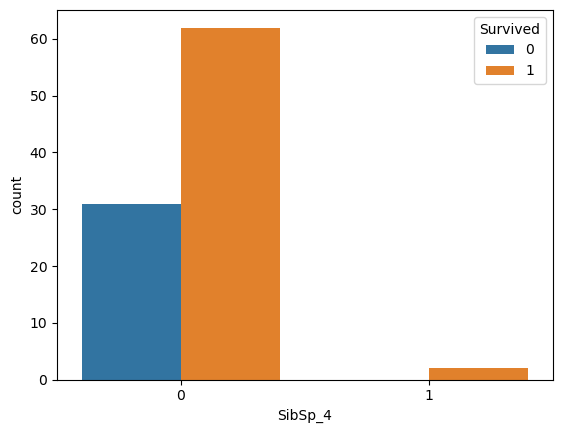

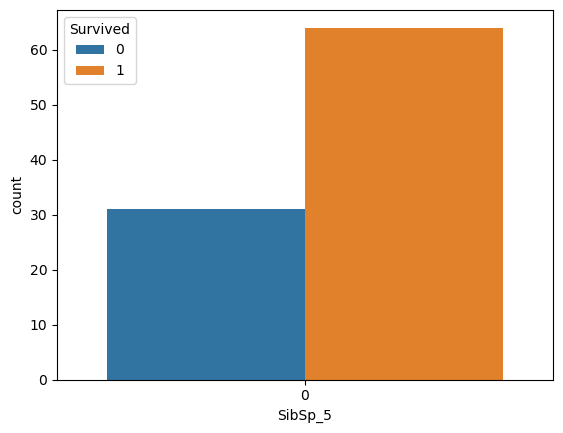

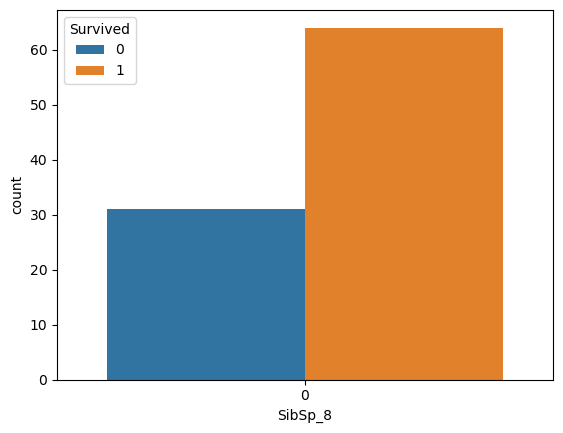

In [33]:
indices = np.where(mismatched_rows==True)[0]
df_train_sub = df_train.iloc[indices]

for feature in df_train_sub.columns:

    sns.countplot(x=feature,hue='Survived',data=df_train_sub)
    plt.show()


In [34]:
df_train_raw = pd.read_csv(os.path.join(my_path, 'train.csv'))

In [36]:
df_error = df_train_raw.iloc[indices]
df_error

PassengerId  Survived  Pclass  \
14            15         0       3   
17            18         1       2   
21            22         1       2   
25            26         1       3   
36            37         1       3   
..           ...       ...     ...   
830          831         1       3   
852          853         0       3   
854          855         0       2   
855          856         1       3   
857          858         1       1   

                                                  Name     Sex   Age  SibSp  \
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
21                               Beesley, Mr. Lawrence    male  34.0      0   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
36                                    Mamee, Mr. Hanna    male   NaN      0   
..                                                 ...     ...   ...    ...   
830            Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0      1   
852                            Boulos, Miss. Nourelain  female   9.0      1   
854      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0      1   
855                         Aks, Mrs. Sam (Leah Rosen)  female  18.0      0   
857                             Daly, Mr. Peter Denis     male  51.0      0   

     Parch  Ticket     Fare Cabin Embarked  
14       0  350406   7.8542   NaN        S  
17       0  244373  13.0000   NaN        S  
21       0  248698  13.0000   D56        S  
25       5  347077  31.3875   NaN        S  
36       0    2677   7.2292   NaN        C  
..     ...     ...      ...   ...      ...  
830      0    2659  14.4542   NaN        C  
852      1    2678  15.2458   NaN        C  
854      0  244252  26.0000   NaN        S  
855      1  392091   9.3500   NaN        S  
857      0  113055  26.5500   E17        S  

[95 rows x 12 columns]

In [38]:
df_error.to_csv('titanic_error_analysis.csv')